## **MY FIRST GOOGLE COLAB PROJECT**

In [2]:
from google.colab import drive
import matplotlib.pyplot as plt


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
uber_data = pd.read_csv('/content/drive/MyDrive/Datasets/uber-raw-data-sep14.csv')

In [5]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [6]:
uber_data.shape

(1028136, 4)

In [7]:
uber_data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

**Lets break the Date/Time column into "Day", "Hour" and "Weekday"**

In [8]:
#chnage the 'Data/Time' column's data type from string to datatime
#uber_data['Date/Time']
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

In [9]:
uber_data.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

**Creating a column for day, hour, and weekend elements.** *and extrating the appropraite detail*s

In [10]:
uber_data['Day'] = uber_data['Date/Time'].apply(lambda x: x.day)
uber_data['Hour'] = uber_data['Date/Time']. apply(lambda x: x.hour)
uber_data['Weekday'] = uber_data['Date/Time'].apply(lambda x: x.weekday())
uber_data.head()

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


In [11]:
uber_data.tail(5)

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,22,1


**Now we can check the density of ride per day of the month** visually *italicized text*

Text(0, 0.5, 'Density of rides')

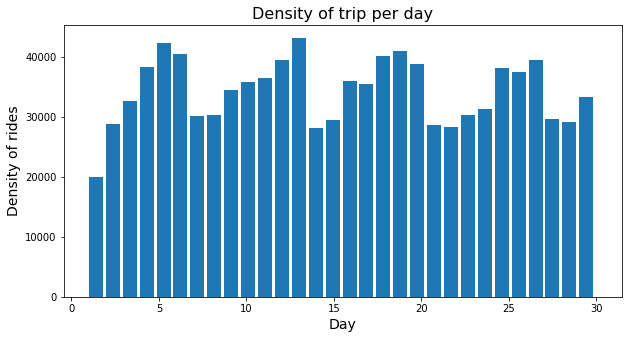

In [34]:
Fig, ax = plt.subplots(figsize = (10,5))
plt.hist(uber_data.Day, width = 0.8, bins = 30)
plt.title('Density of trip per day', fontsize = 16)
plt.xlabel('Day', fontsize = 14)
plt.ylabel('Density of rides', fontsize = 14)

**From the above plot we can notice that the highest number of rides are during working days (Monday to Friday), while the least number of rides are in weekends**

Text(0, 0.5, 'Density of rides')

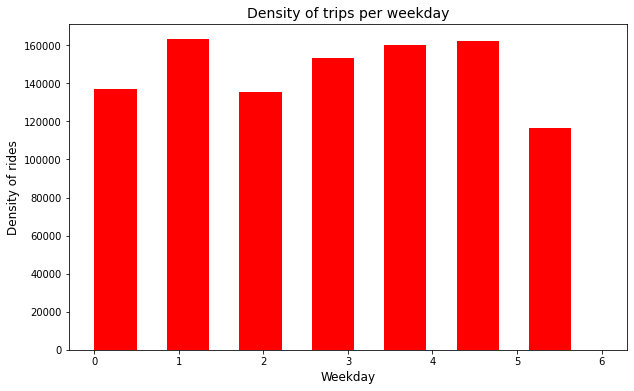

In [41]:
#visualizing the density of rides per weekday
fig, axs = plt.subplots(figsize = (10,6))
plt.hist(uber_data.Weekday, width = 0.5, bins = 7, color = 'red')
plt.title('Density of trips per weekday', fontsize = 14)
plt.xlabel('Weekday', fontsize = 12)
plt.ylabel('Density of rides', fontsize = 12)


**The busiest day in the week for Uber is Monday. On the other hand, Saturday is the day with the least number of rides.**

Text(0, 0.5, 'Density of rides')

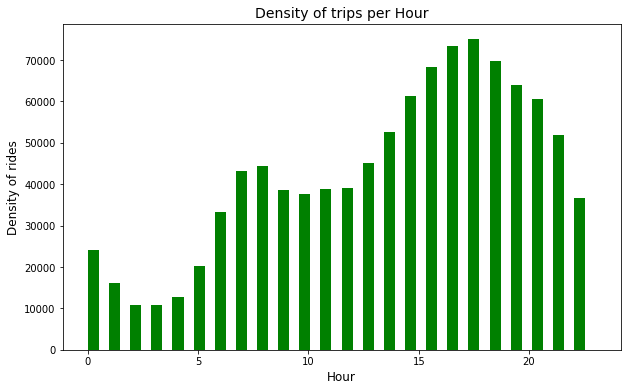

In [42]:
#visualizing the density of rides per hour
fig, axs = plt.subplots(figsize = (10,6))
plt.hist(uber_data.Hour, width = 0.5, bins = 24, color = 'green')
plt.title('Density of trips per Hour', fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Density of rides', fontsize = 12)

**It seems like the number of rides decrease gradually from 1 AM to 4 PM and then increases starting from 5 AM onward till it reaches 6 PM which is the hour with the highest number of rides.**

Text(0, 0.5, 'Density of rides')

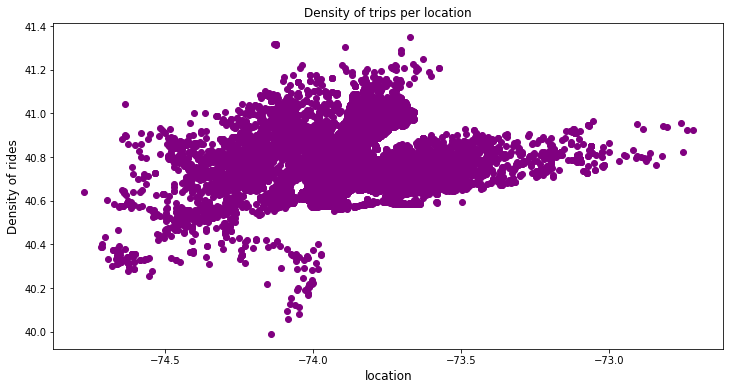

In [45]:
#Visualize the Density of rides per location
Fig, ax = plt.subplots(figsize = (12,6))
x = uber_data.Lon
y = uber_data.Lat
plt.scatter(x,y, color = 'purple')
plt.title('Density of trips per location', fontsize = 12)
plt.xlabel('location', fontsize = 12)
plt.ylabel('Density of rides', fontsize = 12)

**The region with the highest density of rides is near Manhattan and Newburgh. While the region with the lowest density is near New Jersey**